# Particle Tracking in the Ocean

See the [IndividualDisplacements.jl](https://juliaclimate.github.io/IndividualDisplacements.jl/dev/) package docs that provides many examples. In the one used here, we focus on the three Dimensional Ocean Circulation and use the ([OCCA1](https://doi.org/10.1175/2009JPO4043.1) ocean state estimate. 

The calculation advects particles with the climatological mean flow in three dimensions starting from a selected depth level (e.g. `k=10` for 95 m) and region using a near-global ocean state estimate ([OCCA](https://doi.org/10.1175/2009JPO4043.1) which is here repeated for two years. For additional documentation e.g. see : [1](https://JuliaClimate.github.io/MeshArrays.jl/dev/), [2](https://JuliaClimate.github.io/IndividualDisplacements.jl/dev/), [3](https://docs.juliadiffeq.org/latest/solvers/ode_solve.html), [4](https://en.wikipedia.org/wiki/Displacement_(vector))

_note : you can also use MITgcm/pkg/flt to do this._

## Setup Julia

In [1]:
begin #set up
    using IndividualDisplacements, CairoMakie, Climatology, NetCDF
	p0=joinpath(dirname(pathof(IndividualDisplacements)),"..","examples")
	f0=joinpath(p0,"worldwide","OCCA_FlowFields.jl")
	include(f0)
	"Done with loading packages"
end

"Done with loading packages"

## Setup Calculation

In [2]:
𝑃,𝐷=OCCA_FlowFields.setup(nmax=5)
"Done with FlowFields"

"Done with FlowFields"

In [3]:
nf=100; lo=(-160.0,-150.0); la=(30.0,40.0); level=2.5;
df=OCCA_FlowFields.initial_positions(𝐷.Γ, nf, lo, la, level)
"Done with initial positions"

𝐼=Individuals(𝑃,df.x,df.y,df.z,df.f,
    (🔴=OCCA_FlowFields.custom🔴,🔧=OCCA_FlowFields.custom🔧, 𝐷=𝐷))
"Done with Individuals"

"Done with Individuals"

## Compute Displacements

In [4]:
𝑇=(0.0,10*86400.0)
∫!(𝐼,𝑇)

1×100 Matrix{Nothing}:
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing

## Visualize Displacements

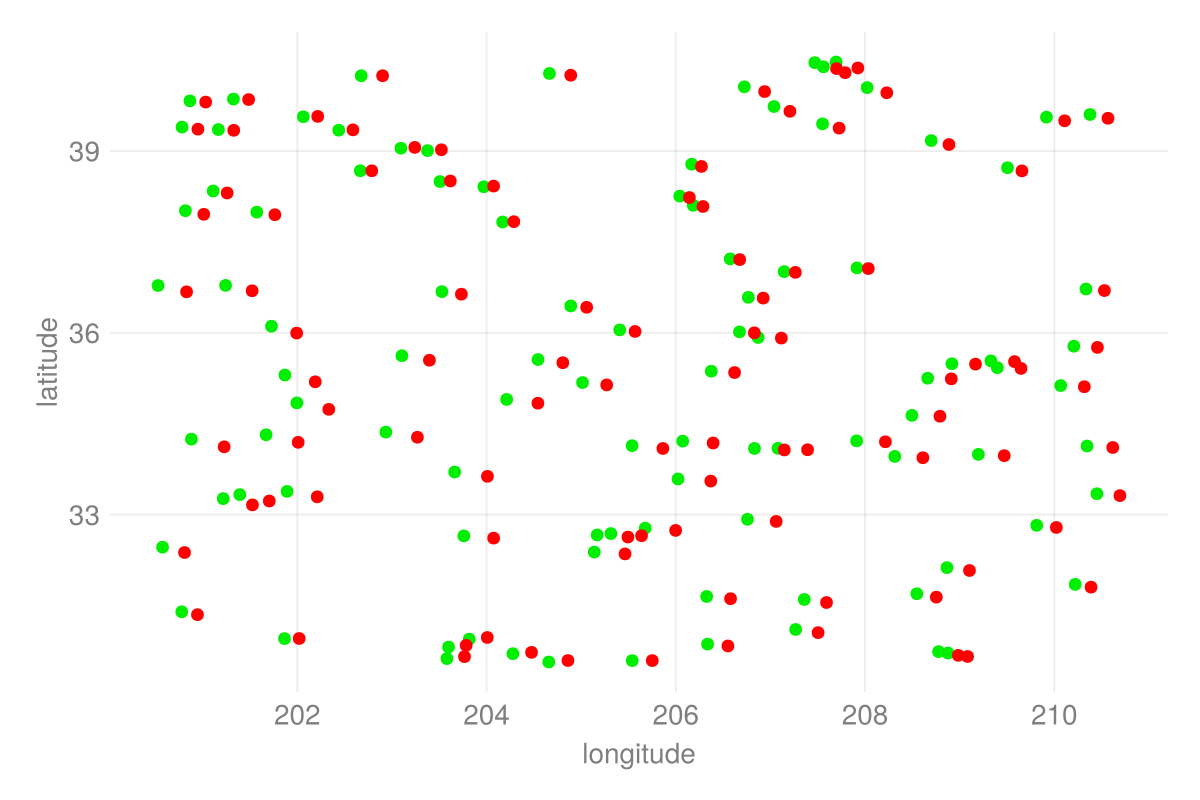

In [7]:
"""
    myplot(𝐼::Individuals)

Plot the initial and final positions as scatter plot in `lon,lat` or `x,y` plane.
"""
function myplot(𝐼::Individuals)
	🔴_by_t = IndividualDisplacements.DataFrames.groupby(𝐼.🔴, :t)
	set_theme!(theme_light())
	fig=Figure(size = (600, 400))
    a = Axis(fig[1, 1],xlabel="longitude",ylabel="latitude")		
    scatter!(a,🔴_by_t[1].lon,🔴_by_t[1].lat,color=:green2)
    scatter!(a,🔴_by_t[end].lon,🔴_by_t[end].lat,color=:red)
    return fig
end

myplot(𝐼)